<a href="https://colab.research.google.com/github/AT200210/Data_Science/blob/main/ML/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report

In [44]:
!pip install category_encoders

In [45]:
data=pd.read_csv('adult.csv')
data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [46]:
data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [47]:
col_names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data.columns=col_names

In [48]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
categorical=[var for var in data.columns if data[var].dtype=='O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [51]:
# for var in categorical:
#   print(data[var].value_counts)

data['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [52]:
data['workclass'].isnull().sum()

np.int64(0)

In [53]:
data['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [54]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [55]:
data['marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [56]:
data['occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [57]:
data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [58]:
data['workclass'].replace(' ?',np.nan, inplace=True)

<ipython-input-58-4ea93f3628b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace(' ?',np.nan, inplace=True)


In [59]:
data['workclass'].isnull().sum()

np.int64(1836)

In [60]:
data['occupation'].replace(' ?',np.nan, inplace=True)
data['native_country'].replace(' ?',np.nan, inplace=True)

<ipython-input-60-bda4b6706250>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace(' ?',np.nan, inplace=True)
<ipython-input-60-bda4b6706250>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [61]:
data['occupation'].isnull().sum()

np.int64(1843)

In [62]:
data['native_country'].isnull().sum()

np.int64(583)

In [63]:
numerical=[var for var in data.columns if data[var].dtype!='O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [64]:
correlation=data[numerical].corr()

<Axes: >

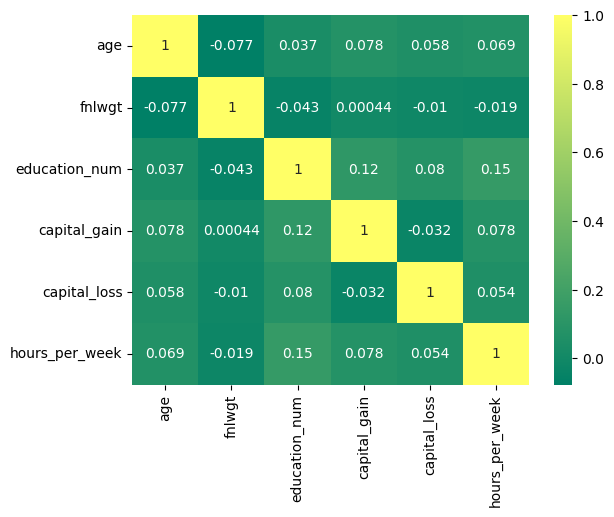

In [65]:
sns.heatmap(correlation,annot=True,cmap='summer')

In [66]:
X=data.drop(['income'],axis=1)
y=data['income']

In [67]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
# Assumptions of svm and logostic regression and practial

In [69]:
categorical_train=[col for col in X_train.columns if X_train[col].dtype=='O']
categorical_train

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [70]:
numerical_train=[col for col in X_train.columns if X_train[col].dtype!='O']
numerical_train

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [71]:
for df2 in [X_train, X_test]:
  df2['workclass'].fillna(X_train['workclass'].mode()[0],inplace=True)
  df2['occupation'].fillna(X_train['occupation'].mode()[0],inplace=True)
  df2['native_country'].fillna(X_train['native_country'].mode()[0],inplace=True)

<ipython-input-71-4e2d0844a471>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['workclass'].fillna(X_train['workclass'].mode()[0],inplace=True)
<ipython-input-71-4e2d0844a471>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [72]:
X_train.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [73]:
from category_encoders import OneHotEncoder

In [74]:
!pip install category_encoders

In [75]:
en=OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
X_train=en.fit_transform(X_train)
X_test=en.transform(X_test)

In [76]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
24639,20,1,0,0,0,0,0,0,0,385077,...,0,0,0,0,0,0,0,0,0,0
5514,21,0,1,0,0,0,0,0,0,140764,...,0,0,0,0,0,0,0,0,0,0
19777,64,1,0,0,0,0,0,0,0,312242,...,0,0,0,0,0,0,0,0,0,0
10781,26,1,0,0,0,0,0,0,0,227489,...,0,0,0,0,0,0,0,0,0,0
32239,21,1,0,0,0,0,0,0,0,180190,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,35,1,0,0,0,0,0,0,0,109351,...,0,0,0,0,0,0,0,0,0,0
5390,31,1,0,0,0,0,0,0,0,101562,...,0,0,0,0,0,0,0,0,0,0
860,43,1,0,0,0,0,0,0,0,191547,...,0,0,0,0,0,0,0,0,0,0
15795,21,1,0,0,0,0,0,0,0,223352,...,0,0,0,0,0,0,0,0,0,0


In [77]:
cols=X_train.columns

In [78]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [79]:
X_test

array([[ 0.05,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.4 , -1.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.4 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.3 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.5 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [82]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_test=pd.DataFrame(X_test,columns=[cols])

In [85]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [86]:
y_pred=gnb.predict(X_test)
y_pred

array([' <=50K', ' >50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.79      0.86      4912
        >50K       0.56      0.82      0.67      1600

    accuracy                           0.80      6512
   macro avg       0.75      0.81      0.76      6512
weighted avg       0.84      0.80      0.81      6512



In [89]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [90]:
y_pred2=bnb.predict(X_test)
y_pred2

array([' <=50K', ' >50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [91]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

       <=50K       0.91      0.79      0.85      4912
        >50K       0.54      0.76      0.63      1600

    accuracy                           0.78      6512
   macro avg       0.73      0.78      0.74      6512
weighted avg       0.82      0.78      0.80      6512

